In [ ]:
#importing the required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, exp, Mul , pi, sqrt, DiracDelta
import seaborn as sns

from sympy.utilities.lambdify import lambdify
import pandas as pd
import csv
from scipy.stats import norm
import math

from google.colab import drive

In [ ]:
#shiham

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Kaggle



Mounted at /content/gdrive/
/content/gdrive/MyDrive/Kaggle


In [ ]:
csv_file = 'daily_data.csv'#make sure to have the Labels column
# csv_file = 'csv_all.csv'
dataset = pd.read_csv(csv_file)

datasetNP = dataset.iloc[:, :17].values
print(dataset.head())
print(datasetNP.shape)

  day_id city_id  temperature_celsius           condition_text  wind_kph  \
0  D0001    C001                 27.0                      NaN       6.1   
1  D0002    C001                 22.0                      NaN       6.1   
2  D0003    C001                 20.0  Light Rain with Thunder       3.6   
3  D0004    C001                 17.0          Clear and Sunny       6.1   
4  D0005    C001                 18.0                      NaN       3.6   

   wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
0          210       1006.0        0.0        54     75                28.0   
1          170       1006.0        0.0        73     75                24.5   
2           10       1011.0        4.5       100     75                20.0   
3          150       1018.0        0.0        88      0                17.0   
4           92       1019.0        0.0        94      0                18.0   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index   sun

In [ ]:
#pandula

csv_file = './Data/daily_data.csv'#make sure to have the Labels column
# csv_file = 'csv_all.csv'
dataset = pd.read_csv(csv_file)

datasetNP = dataset.iloc[:, :17].values
print(dataset.head())
print(datasetNP.shape)

  day_id city_id  temperature_celsius           condition_text  wind_kph  \
0  D0001    C001                 27.0                      NaN       6.1   
1  D0002    C001                 22.0                      NaN       6.1   
2  D0003    C001                 20.0  Light Rain with Thunder       3.6   
3  D0004    C001                 17.0          Clear and Sunny       6.1   
4  D0005    C001                 18.0                      NaN       3.6   

   wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
0          210       1006.0        0.0        54     75                28.0   
1          170       1006.0        0.0        73     75                24.5   
2           10       1011.0        4.5       100     75                20.0   
3          150       1018.0        0.0        88      0                17.0   
4           92       1019.0        0.0        94      0                18.0   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index   sun

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

In [ ]:
dataset.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


In [ ]:
df_num=dataset[['temperature_celsius', 'wind_kph','wind_degree', 'pressure_mb','precip_mm', 'humidity', 'cloud','feels_like_celsius','visibility_km','uv_index','gust_kph','air_quality_us-epa-index']]


df_label=dataset[['condition_text','sunrise','sunset']]

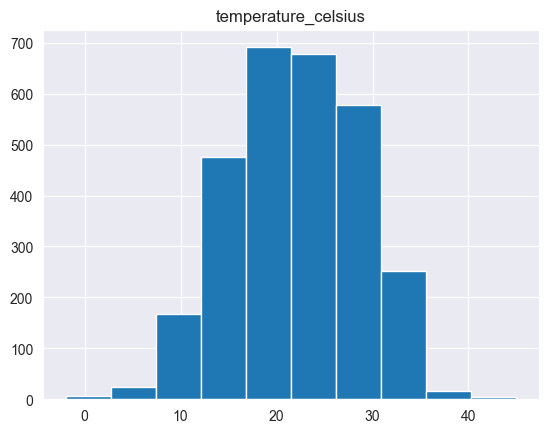

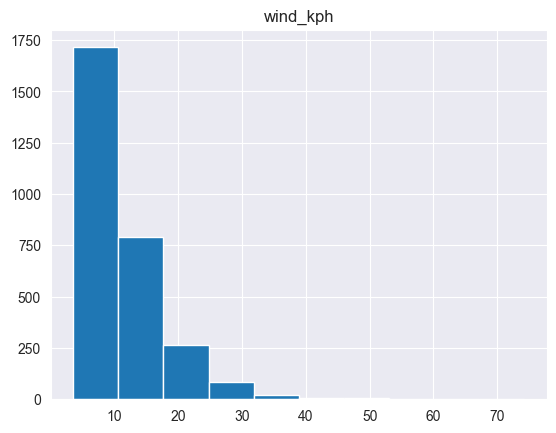

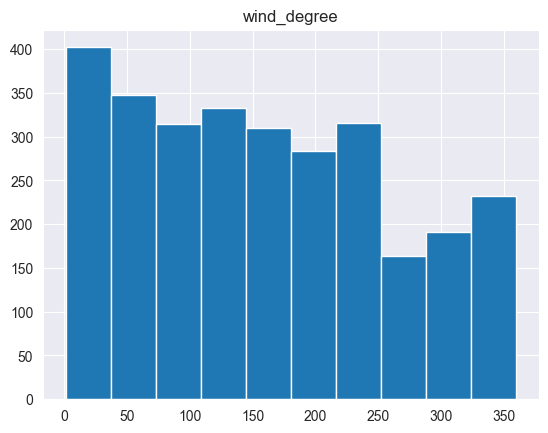

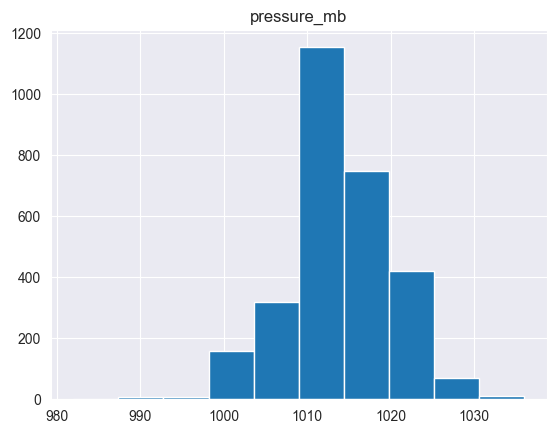

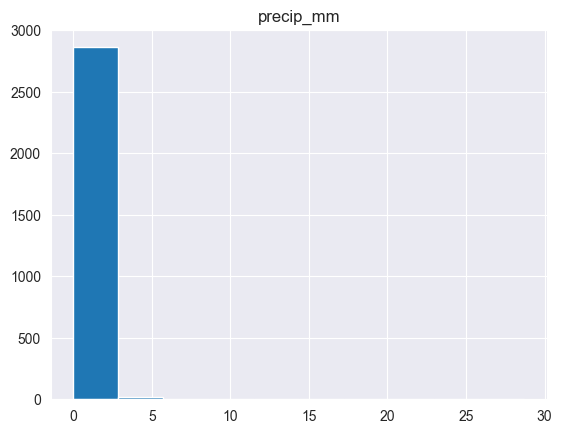

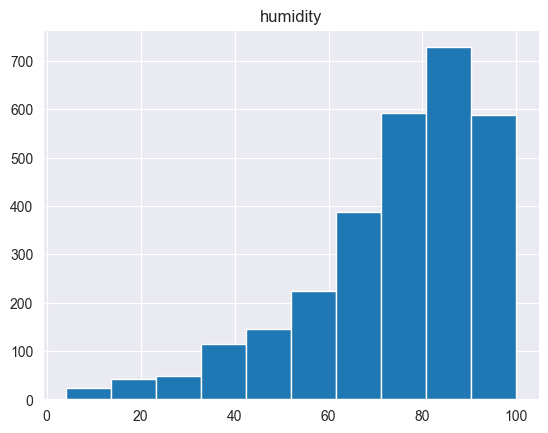

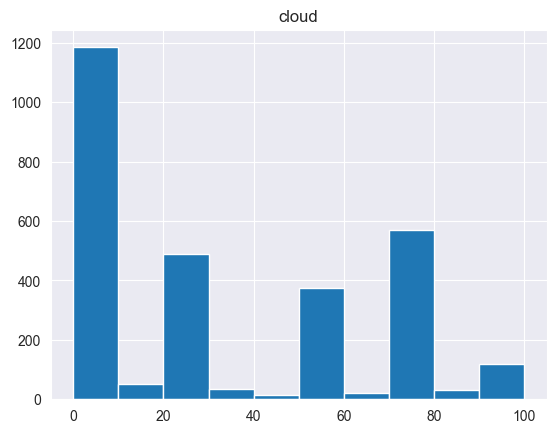

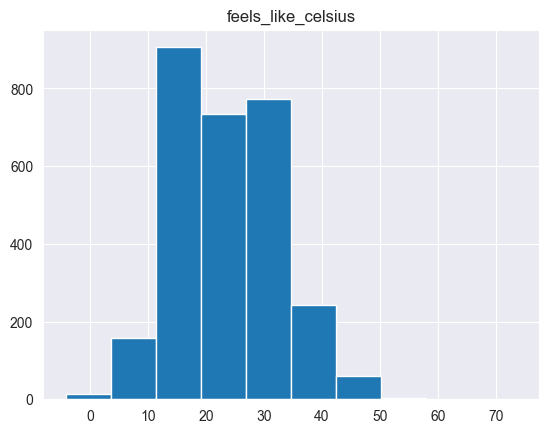

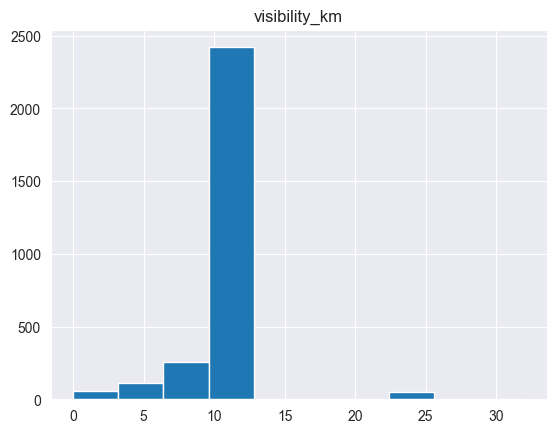

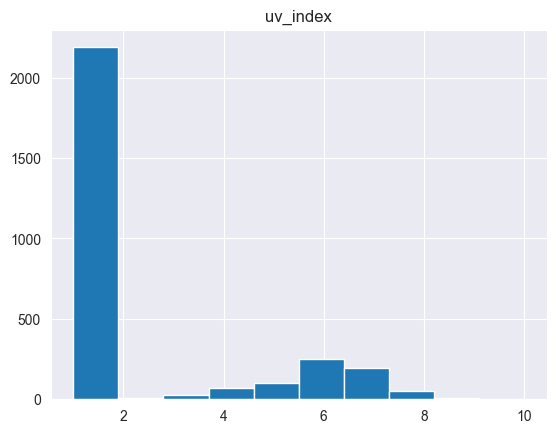

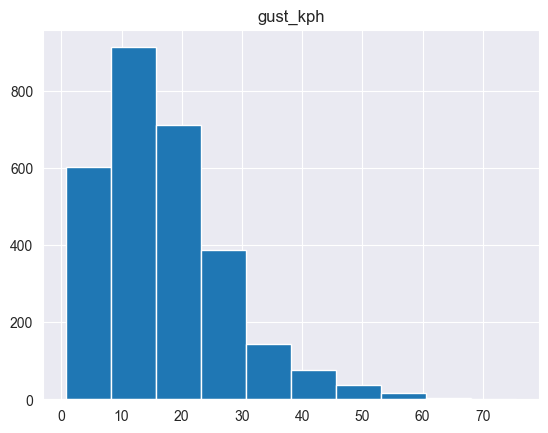

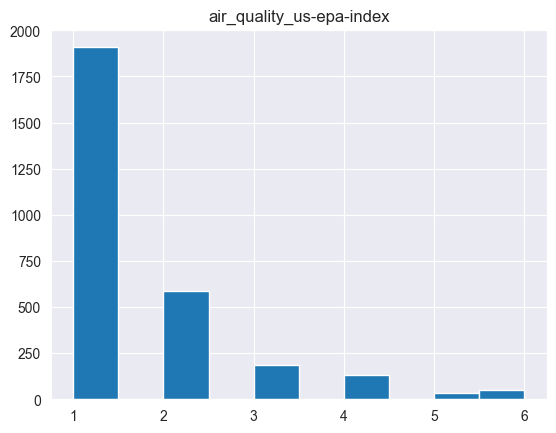

In [ ]:
#distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: >

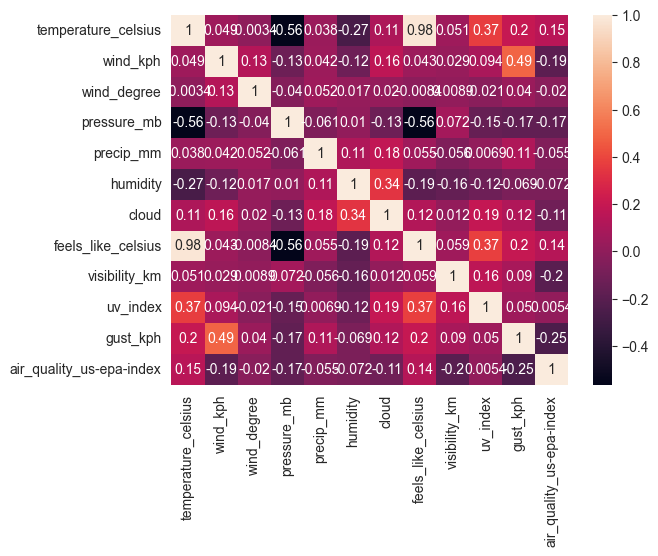

In [ ]:
# print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True)

In [ ]:
csv_file = 'daily_data.csv'#make sure to have the Labels column
# csv_file = 'csv_all.csv'
dataset_testing = pd.read_csv(csv_file)


training_set = dataset[dataset['condition_text'].notnull()]
testing_set = dataset_testing[dataset_testing['condition_text'].isnull()]

# Display the shapes of the resulting datasets
print("Dataset with 'condition_text' present:", training_set.shape)
print("Dataset with 'condition_text' absent:", testing_set.shape)

print(training_set.head())
print(testing_set.head())

Dataset with 'condition_text' present: (479, 17)
Dataset with 'condition_text' absent: (2414, 17)
   day_id city_id  temperature_celsius           condition_text  wind_kph  \
2   D0003    C001                 20.0  Light Rain with Thunder       3.6   
3   D0004    C001                 17.0          Clear and Sunny       6.1   
6   D0007    C001                 21.0            Partly Cloudy       4.0   
18  D0019    C001                 19.0          Clear and Sunny       3.6   
27  D0028    C002                 19.0            Partly Cloudy       3.6   

    wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
2            10       1011.0        4.5       100     75                20.0   
3           150       1018.0        0.0        88      0                17.0   
6           310       1015.0        0.0       100     50                21.0   
18           64       1017.0        0.0        88      0                19.0   
27           83       1010.0        0.0

**BOX PLOTS**

In [ ]:
conditions = training_set['condition_text'].unique()
features =list(training_set.columns)
print(conditions)
print(features)

['Light Rain with Thunder' 'Clear and Sunny' 'Partly Cloudy'
 'Light Precipitation' 'Cloudy and Overcast' 'Mist or Fog' 'Rain Showers'
 'Moderate to Heavy Rain' 'Thunderstorms']
['day_id', 'city_id', 'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset']


temperature_celsius


<Axes: title={'center': 'temperature_celsius'}, xlabel='condition_text'>

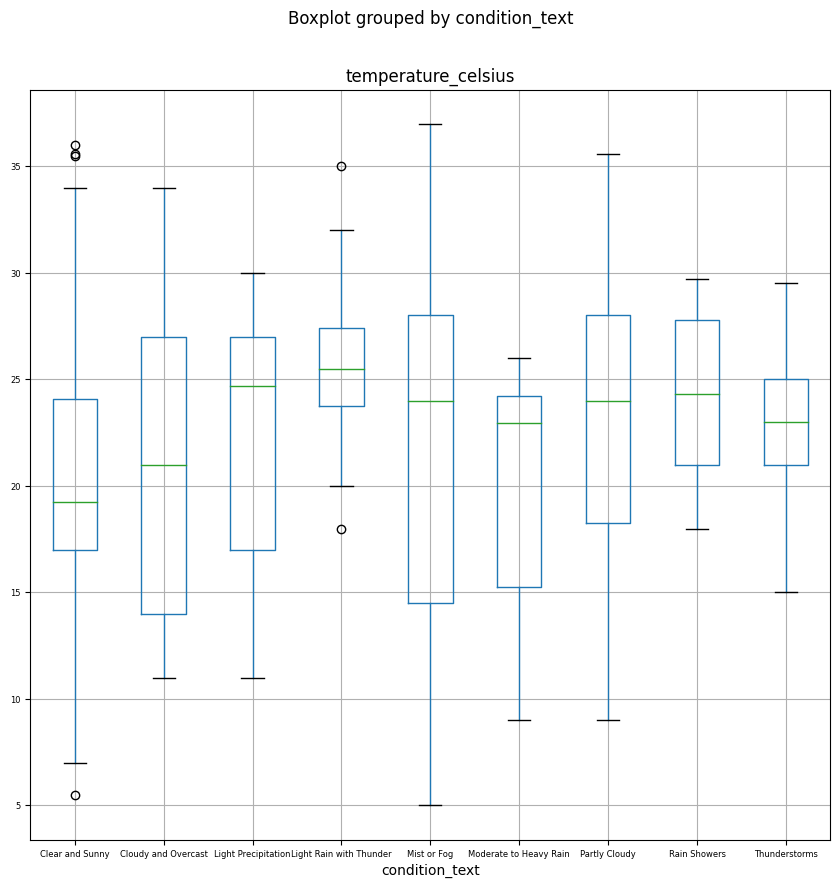

In [ ]:
condition = conditions[0]
feature = features[2] # start from 2
print(feature)

training_set.boxplot(column=feature, by='condition_text',fontsize=6, figsize=(10,10))
# training_set.boxplot(column='wind_kph', by='condition_text',fontsize=6, figsize=(10,10))


**Converting time to needed format**

In [ ]:
from datetime import datetime

# Load the dataset
df = pd.read_csv('daily_data.csv')

# Convert time strings to datetime objects
df['sunrise'] = pd.to_datetime(df['sunrise'], format='%I:%M %p')
df['sunset'] = pd.to_datetime(df['sunset'], format='%I:%M %p')

# Format the datetime objects to the desired string format
df['sunrise'] = df['sunrise'].dt.strftime('%H%M')
df['sunset'] = df['sunset'].dt.strftime('%H%M')

# Save the processed DataFrame
df.to_csv('processed_dataset.csv', index=False)

# Display the first few rows of the processed DataFrame
print(df.head())

  day_id city_id  temperature_celsius           condition_text  wind_kph  \
0  D0001    C001                 27.0                      NaN       6.1   
1  D0002    C001                 22.0                      NaN       6.1   
2  D0003    C001                 20.0  Light Rain with Thunder       3.6   
3  D0004    C001                 17.0          Clear and Sunny       6.1   
4  D0005    C001                 18.0                      NaN       3.6   

   wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
0          210       1006.0        0.0        54     75                28.0   
1          170       1006.0        0.0        73     75                24.5   
2           10       1011.0        4.5       100     75                20.0   
3          150       1018.0        0.0        88      0                17.0   
4           92       1019.0        0.0        94      0                18.0   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index sunri

In [ ]:
training_set = df[df['condition_text'].notnull()]
testing_set = df[df['condition_text'].isnull()]

# Display the shapes of the resulting datasets
print("Dataset with 'condition_text' present:", training_set.shape)
print("Dataset with 'condition_text' absent:", testing_set.shape)

print(training_set.head())
print(testing_set.tail())

Dataset with 'condition_text' present: (479, 17)
Dataset with 'condition_text' absent: (2414, 17)
   day_id city_id  temperature_celsius           condition_text  wind_kph  \
2   D0003    C001                 20.0  Light Rain with Thunder       3.6   
3   D0004    C001                 17.0          Clear and Sunny       6.1   
6   D0007    C001                 21.0            Partly Cloudy       4.0   
18  D0019    C001                 19.0          Clear and Sunny       3.6   
27  D0028    C002                 19.0            Partly Cloudy       3.6   

    wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
2            10       1011.0        4.5       100     75                20.0   
3           150       1018.0        0.0        88      0                17.0   
6           310       1015.0        0.0       100     50                21.0   
18           64       1017.0        0.0        88      0                19.0   
27           83       1010.0        0.0

**Normalizing feature**

In [ ]:
from sklearn.preprocessing import StandardScaler


# Select the columns to be standardized
columns_to_standardize = training_set.columns  # Assuming you want to standardize all columns


standard_scaler = StandardScaler()
excluded_columns = ['day_id', 'city_id', 'condition_text']
columns_to_standardize = df.columns.difference(excluded_columns)

training_set[columns_to_standardize] = standard_scaler.fit_transform(training_set[columns_to_standardize])


training_set.to_csv('standardized_dataset.csv', index=False)


print(training_set.head())

   day_id city_id  temperature_celsius           condition_text  wind_kph  \
2   D0003    C001            -0.325687  Light Rain with Thunder -0.976376   
3   D0004    C001            -0.791186          Clear and Sunny -0.634911   
6   D0007    C001            -0.170521            Partly Cloudy -0.921742   
18  D0019    C001            -0.480854          Clear and Sunny -0.976376   
27  D0028    C002            -0.480854            Partly Cloudy -0.976376   

    wind_degree  pressure_mb  precip_mm  humidity     cloud  \
2     -1.491115    -0.345813   3.808121  1.160612  0.802314   
3     -0.084787     0.802218  -0.246614  0.506188 -1.269057   
6      1.522446     0.310205  -0.246614  1.160612  0.111857   
18    -0.948674     0.638214  -0.246614  0.506188 -1.269057   
27    -0.757815    -0.509818  -0.246614 -0.311842 -0.578600   

    feels_like_celsius  visibility_km  uv_index  gust_kph  \
2            -0.442245       0.187573 -0.560011 -0.466108   
3            -0.791270       0.18757

<ipython-input-16-80435f32d8d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set[columns_to_standardize] = standard_scaler.fit_transform(training_set[columns_to_standardize])


Text(0, 0.5, 'Frequency')

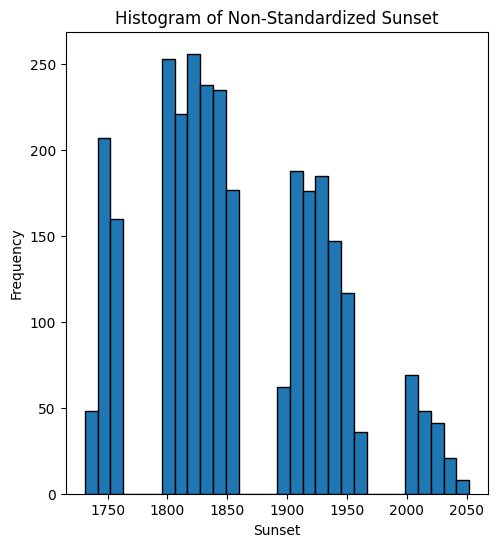

In [ ]:
df = pd.read_csv('processed_dataset.csv')#un-standardized set


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['sunset'], bins=30, edgecolor='black')
plt.title('Histogram of Non-Standardized Sunset')
plt.xlabel('Sunset')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

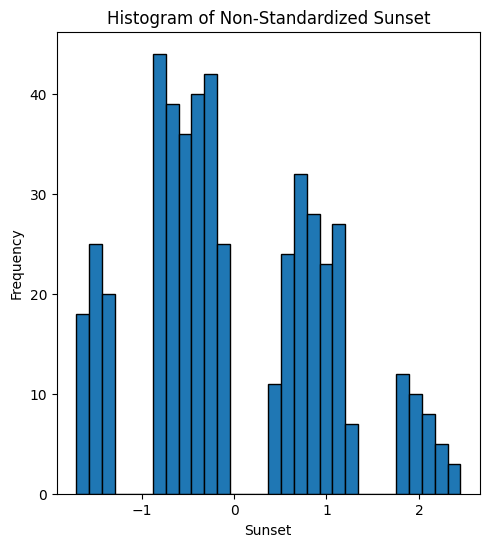

In [ ]:
df = pd.read_csv('standardized_dataset.csv')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['sunset'], bins=30, edgecolor='black')
plt.title('Histogram of Non-Standardized Sunset')
plt.xlabel('Sunset')
plt.ylabel('Frequency')

In [ ]:
df = pd.read_csv('standardized_dataset.csv')
conditions = training_set['condition_text'].unique()
features =list(training_set.columns)
print(conditions)
print(features)

['Light Rain with Thunder' 'Clear and Sunny' 'Partly Cloudy'
 'Light Precipitation' 'Cloudy and Overcast' 'Mist or Fog' 'Rain Showers'
 'Moderate to Heavy Rain' 'Thunderstorms']
['day_id', 'city_id', 'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset']


precip_mm


<Axes: title={'center': 'precip_mm'}, xlabel='condition_text'>

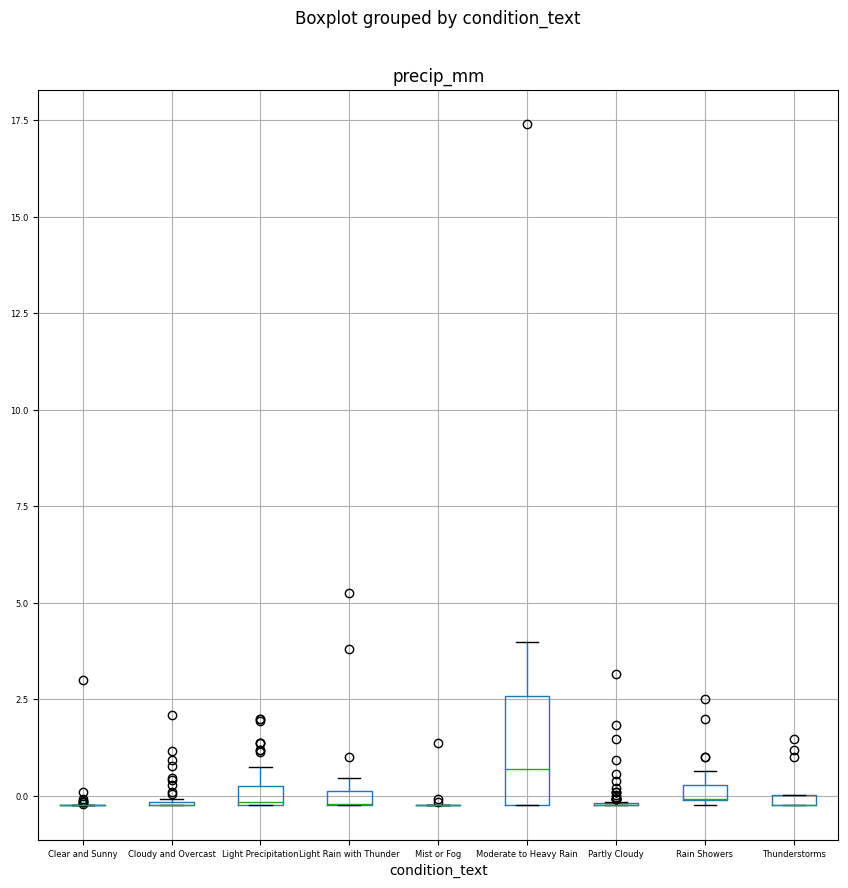

In [ ]:
condition = conditions[0]
feature = features[7] # start from 2
print(feature)

df.boxplot(column=feature, by='condition_text',fontsize=6, figsize=(10,10))
# training_set.boxplot(column='wind_kph', by='condition_text',fontsize=6, figsize=(10,10))


['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset']


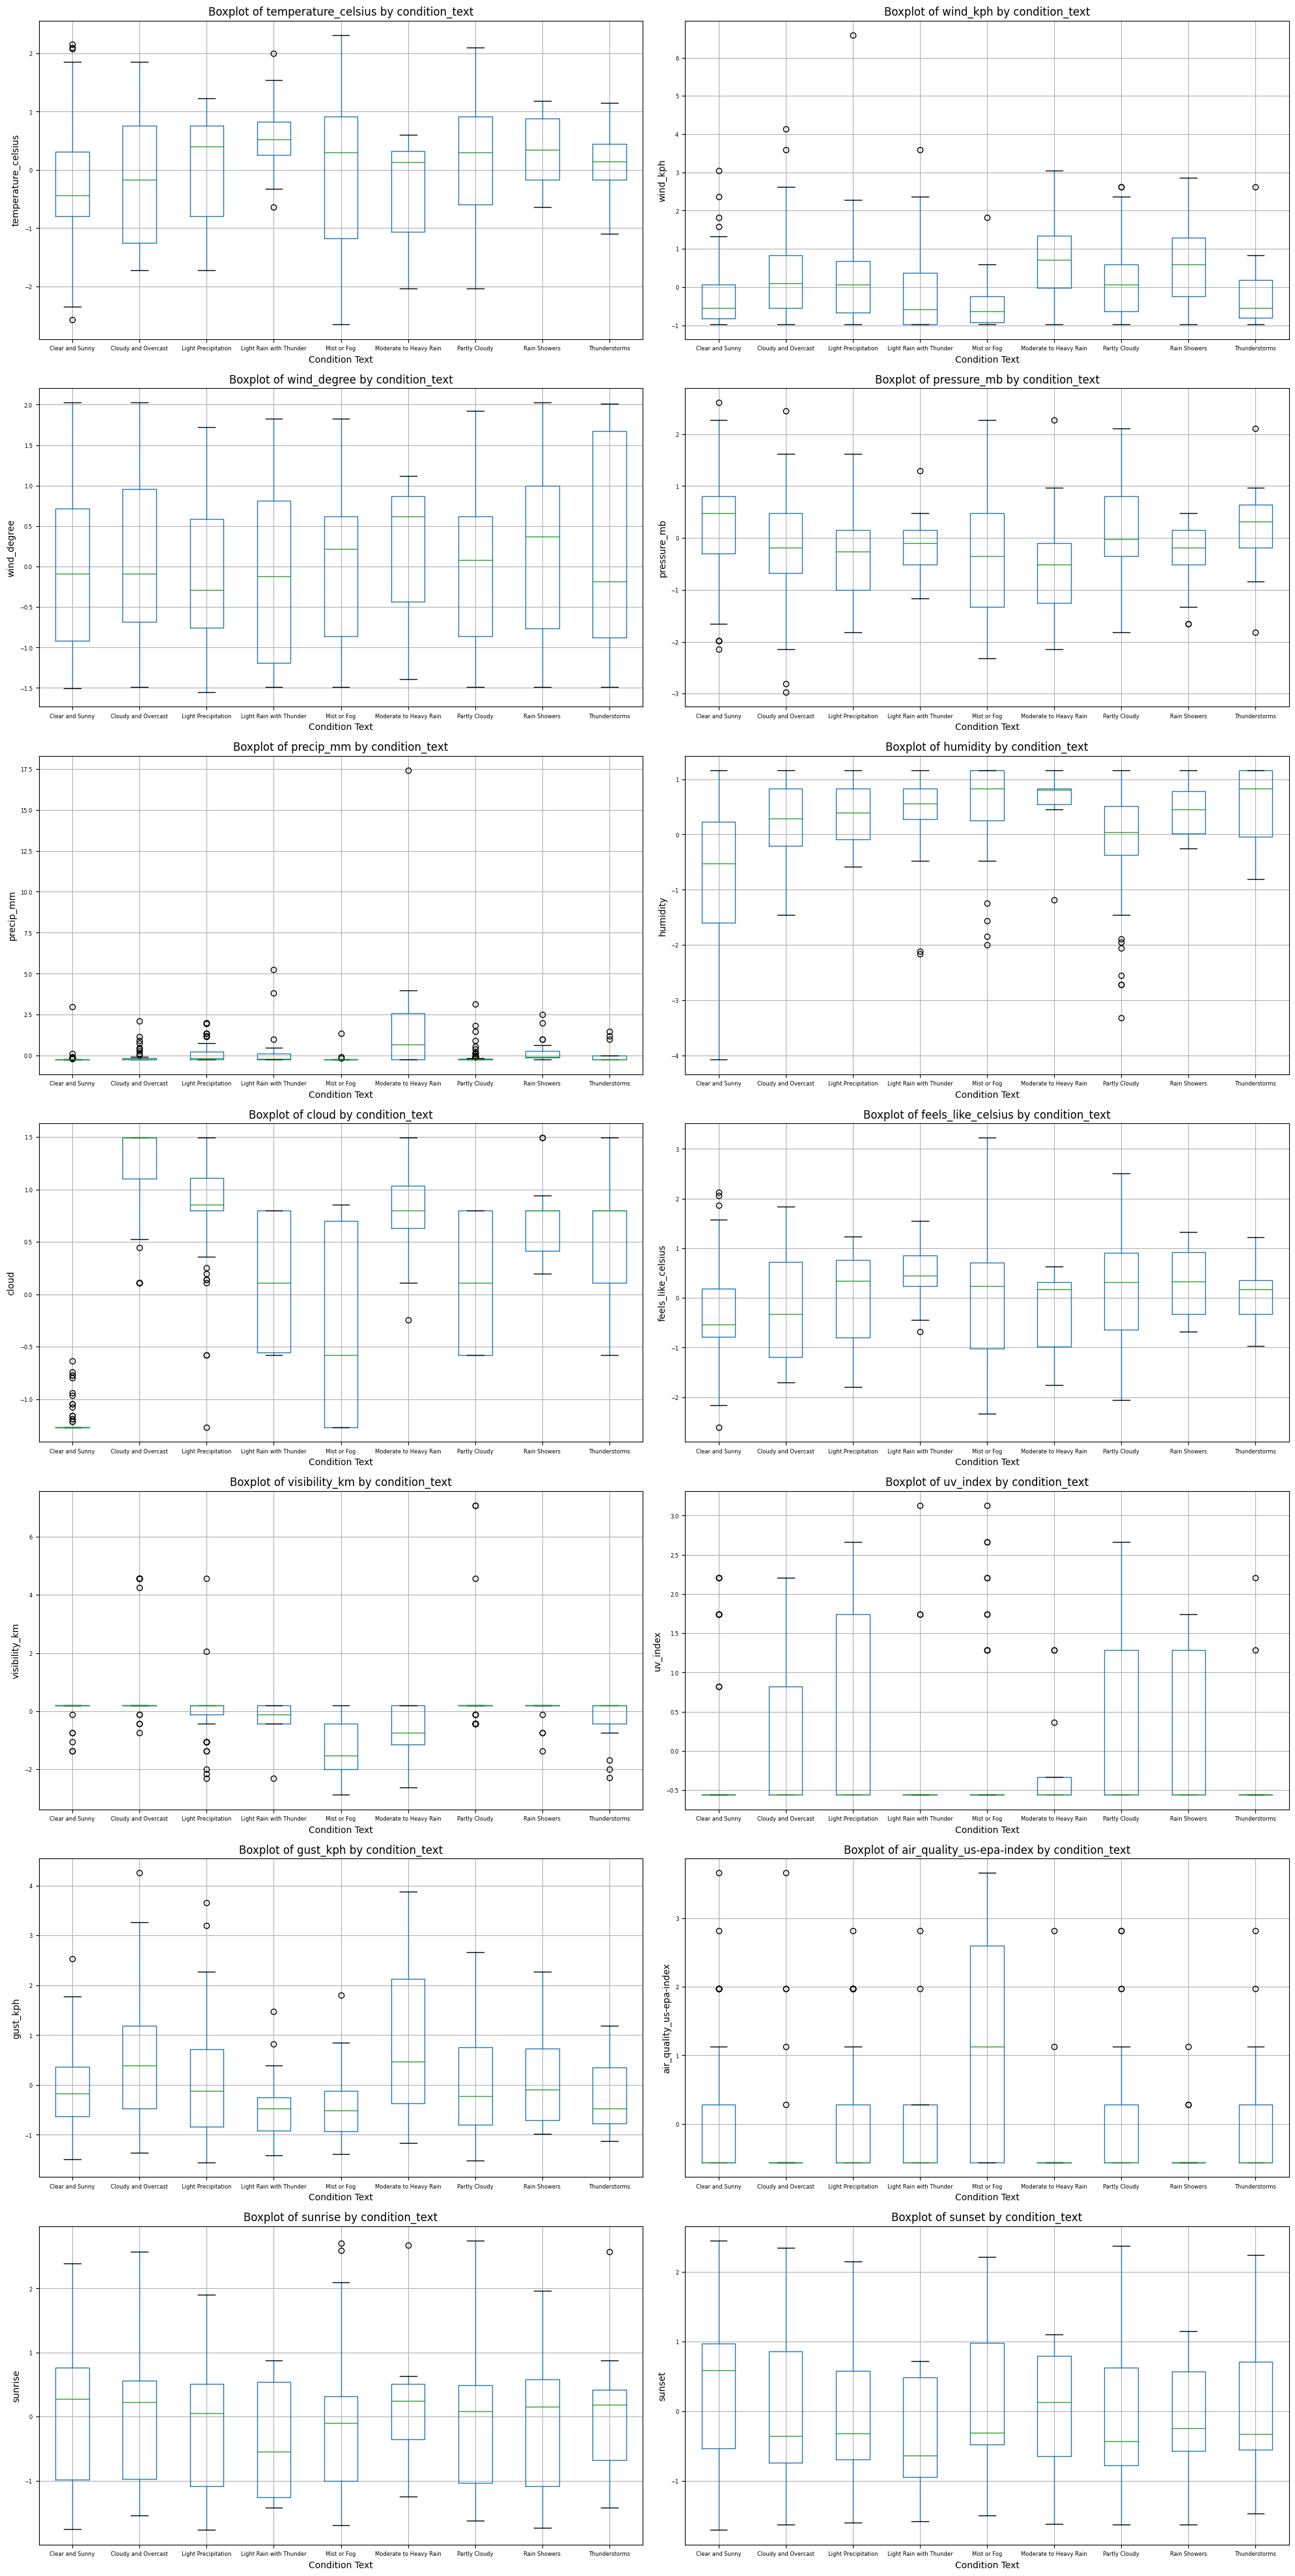

In [ ]:
columns_to_plot = [features[2]] + features[4:17]  # Adjust for zero-based index (column 3 is index 2, column 5 is index 4)
print(columns_to_plot)

num_plots = len(columns_to_plot)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot box plots for each selected column
for i, column in enumerate(columns_to_plot):
    df.boxplot(column=column, by='condition_text', fontsize=6, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by condition_text')
    axes[i].set_xlabel('Condition Text')
    axes[i].set_ylabel(column)

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('')  # Suppress the default suptitle
plt.show()

In [ ]:

from sklearn.preprocessing import OneHotEncoder

# Load the dataset
csv_file = 'pred_set_z_score_normalized.csv'  # Ensure this file contains the 'Labels' column
dataset = pd.read_csv(csv_file)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'city_id' column
city_encoded = encoder.fit_transform(dataset[['city_id']])

# Convert the encoded array back to a DataFrame
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['city_id']))

# Concatenate the encoded DataFrame with the original dataset (dropping the original 'city_id' column)
dataset_encoded = pd.concat([dataset.drop(columns=['city_id']), city_encoded_df], axis=1)

# Display the first few rows of the encoded dataset
print(dataset_encoded.tail())

# Write the encoded dataset to a new CSV file
dataset_encoded.to_csv('output_encoded_dataset_onehotencoder.csv', index=False)

# Print confirmation
print("Dataset with one-hot encoding using OneHotEncoder has been saved to 'encoded_dataset_onehotencoder.csv'")

  day_id  condition_text  temperature_celsius  wind_kph  wind_degree  \
0  D0001             NaN             0.750691 -0.567957     0.490914   
1  D0002             NaN            -0.001477 -0.567957     0.105094   
2  D0005             NaN            -0.603211 -0.912862    -0.647256   
3  D0006             NaN            -0.302344 -0.912862    -0.608674   
4  D0008             NaN            -0.151910  1.377302     1.648376   

   pressure_mb  precip_mm  humidity     cloud  feels_like_celsius  ...  \
0    -1.274335  -0.160286 -1.028924  1.469710            0.480294  ...   
1    -1.274335  -0.160286 -0.051001  1.469710            0.088375  ...   
2     0.830021  -0.160286  1.029862 -0.943332           -0.639473  ...   
3     0.830021  -0.160286  0.721044 -0.943332           -0.415520  ...   
4    -0.464967  -0.160286 -1.080394  1.469710           -0.303543  ...   

   city_id_C103  city_id_C104  city_id_C105  city_id_C106  city_id_C107  \
0           0.0           0.0           0.0    

In [ ]:
print(dataset_encoded.tail())

     day_id  condition_text  temperature_celsius  wind_kph  wind_degree  \
2409  D2888             NaN            -0.377561  0.880640    -0.444701   
2410  D2890             NaN            -0.693471  0.383978    -1.042723   
2411  D2891             NaN            -0.422691  0.177036    -1.090950   
2412  D2892             NaN            -0.422691  0.577124    -0.801585   
2413  D2893             NaN            -0.512951  0.977213    -0.946267   

      pressure_mb  precip_mm  humidity     cloud  feels_like_celsius  ...  \
2409     0.182527  -0.160286 -1.852439 -0.943332           -0.471508  ...   
2410     0.506274  -0.160286 -1.286273 -0.943332           -0.706659  ...   
2411     0.344400  -0.160286 -2.058318 -0.943332           -0.505101  ...   
2412     0.506274  -0.160286 -1.492151 -0.878985           -0.505101  ...   
2413     0.344400  -0.160286 -2.058318 -0.943332           -0.572287  ...   

      city_id_C103  city_id_C104  city_id_C105  city_id_C106  city_id_C107  \
2409    

In [ ]:
with open('encoded_dataset_onehotencoder.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Get the first row (header row)
    header = next(reader)

    # Print the column names
    print(header)

['day_id', 'condition_text', 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset', 'city_id_C002', 'city_id_C004', 'city_id_C005', 'city_id_C006', 'city_id_C007', 'city_id_C008', 'city_id_C009', 'city_id_C010', 'city_id_C011', 'city_id_C012', 'city_id_C013', 'city_id_C014', 'city_id_C015', 'city_id_C016', 'city_id_C017', 'city_id_C018', 'city_id_C019', 'city_id_C020', 'city_id_C021', 'city_id_C022', 'city_id_C023', 'city_id_C024', 'city_id_C025', 'city_id_C026', 'city_id_C027', 'city_id_C028', 'city_id_C029', 'city_id_C030', 'city_id_C031', 'city_id_C032', 'city_id_C033', 'city_id_C034', 'city_id_C035', 'city_id_C036', 'city_id_C037', 'city_id_C038', 'city_id_C039', 'city_id_C040', 'city_id_C041', 'city_id_C042', 'city_id_C043', 'city_id_C044', 'city_id_C045', 'city_id_C046', 'city_id_C047', 'city_id_C048', 'city_id_C049', 'city_id

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


NEW Venture

In [ ]:
train_df = pd.read_csv('training_set_z_score_normalized_day2.csv')
print(train_df.shape)


(479, 17)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    479 non-null    object 
 1   city_id                   479 non-null    object 
 2   condition_text            479 non-null    int64  
 3   temperature_celsius       479 non-null    float64
 4   wind_kph                  479 non-null    float64
 5   wind_degree               479 non-null    float64
 6   pressure_mb               479 non-null    float64
 7   precip_mm                 479 non-null    float64
 8   humidity                  479 non-null    float64
 9   cloud                     479 non-null    float64
 10  feels_like_celsius        479 non-null    float64
 11  visibility_km             479 non-null    float64
 12  uv_index                  479 non-null    float64
 13  gust_kph                  479 non-null    float64
 14  air_qualit

In [ ]:
dataset=train_df.drop(['day_id'], axis=1)
dataset=dataset.drop(['temperature_celsius'], axis=1)
dataset=dataset.drop(['uv_index'], axis=1)
dataset=dataset.drop(['city_id'], axis=1)
dataset=dataset.drop(['air_quality_us-epa-index'], axis=1)
dataset=dataset.drop(['pressure_mb'], axis=1)
dataset=dataset.drop(['sunrise'], axis=1)
dataset=dataset.drop(['sunset'], axis=1)

print(dataset.head())

   condition_text  wind_kph  wind_degree  precip_mm  humidity     cloud  \
0               6 -0.976376    -1.491115   3.808121  1.160612  0.802314   
1               0 -0.634911    -0.084787  -0.246614  0.506188 -1.269057   
2               1 -0.921742     1.522446  -0.246614  1.160612  0.111857   
3               0 -0.976376    -0.948674  -0.246614  0.506188 -1.269057   
4               1 -0.976376    -0.757815  -0.246614 -0.311842 -0.578600   

   feels_like_celsius  visibility_km  gust_kph  
0           -0.442245       0.187573 -0.466108  
1           -0.791270       0.187573 -0.594301  
2           -0.325903       0.187573 -0.237193  
3           -0.558586       0.187573 -0.859843  
4           -0.558586       0.187573 -0.859843  


In [ ]:
value_counts = dataset['condition_text'].value_counts()

print(value_counts)

condition_text
0    122
1    122
2     68
3     53
4     50
5     21
6     16
7     15
8     12
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
train_df = pd.read_csv('encoded_dataset_onehotencoder.csv')
train_df=train_df[['day_id', 'condition_text', 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset', 'city_id_C002', 'city_id_C004', 'city_id_C005', 'city_id_C006', 'city_id_C007', 'city_id_C008', 'city_id_C009', 'city_id_C010', 'city_id_C011', 'city_id_C012', 'city_id_C013', 'city_id_C014', 'city_id_C015', 'city_id_C016', 'city_id_C017', 'city_id_C018', 'city_id_C019', 'city_id_C020', 'city_id_C021', 'city_id_C022', 'city_id_C023', 'city_id_C024', 'city_id_C025', 'city_id_C026', 'city_id_C027', 'city_id_C028', 'city_id_C029', 'city_id_C030', 'city_id_C031', 'city_id_C032', 'city_id_C033', 'city_id_C034', 'city_id_C035', 'city_id_C036', 'city_id_C037', 'city_id_C038', 'city_id_C039', 'city_id_C040', 'city_id_C041', 'city_id_C042', 'city_id_C043', 'city_id_C044', 'city_id_C045', 'city_id_C046', 'city_id_C047', 'city_id_C048', 'city_id_C049', 'city_id_C050', 'city_id_C051', 'city_id_C052', 'city_id_C053', 'city_id_C054', 'city_id_C055', 'city_id_C056', 'city_id_C057', 'city_id_C058', 'city_id_C059', 'city_id_C060', 'city_id_C061', 'city_id_C062', 'city_id_C063', 'city_id_C064', 'city_id_C065', 'city_id_C066', 'city_id_C067', 'city_id_C068', 'city_id_C069', 'city_id_C070', 'city_id_C071', 'city_id_C072', 'city_id_C073', 'city_id_C074', 'city_id_C075', 'city_id_C076', 'city_id_C077', 'city_id_C078', 'city_id_C079', 'city_id_C080', 'city_id_C081', 'city_id_C082', 'city_id_C083', 'city_id_C084', 'city_id_C085', 'city_id_C086', 'city_id_C087', 'city_id_C088', 'city_id_C089', 'city_id_C090', 'city_id_C091', 'city_id_C092', 'city_id_C093', 'city_id_C094', 'city_id_C095', 'city_id_C096', 'city_id_C097', 'city_id_C098', 'city_id_C099', 'city_id_C101', 'city_id_C102', 'city_id_C103', 'city_id_C104', 'city_id_C105', 'city_id_C106', 'city_id_C107', 'city_id_C108', 'city_id_C109', 'city_id_C110', 'city_id_C111', 'city_id_C112']]

In [ ]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

In [ ]:
print(len(X_train),len(X_test))
print(y)


431 48
0      6
1      0
2      1
3      0
4      1
      ..
474    1
475    2
476    0
477    0
478    0
Name: condition_text, Length: 479, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np


# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:", np.bincount(y_train))
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

Class distribution before SMOTE: [111 107  60  47  48  18  15  14  11]
Class distribution after SMOTE: [111 111 111 111 111 111 111 111 111]


In [ ]:
# Set up a CatBoost classifier

model = CatBoostClassifier(loss_function='MultiClass')

class_weights = {
    0: 1,   # class 0
    1: 1,   # class 1
    2: 1, # class 2 - lower weight
    3: 1,   # class 3
    4: 1,   # class 4
    5: 1,   # class 5
    6: 4,   # class 6
    7: 4,   # class 7 - higher weight
    8: 4,   # class 8 - higher weight
        # class 9 - higher weight
}
model = CatBoostClassifier(loss_function='MultiClass', class_weights=class_weights)

# Define the grid of parameters to search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train, verbose=100)

0:	learn: 2.1731246	total: 2.3ms	remaining: 228ms
99:	learn: 1.2536028	total: 204ms	remaining: 0us
0:	learn: 2.1735257	total: 2.7ms	remaining: 267ms
99:	learn: 1.2519770	total: 324ms	remaining: 0us
0:	learn: 2.1730582	total: 3.25ms	remaining: 322ms
99:	learn: 1.2682025	total: 235ms	remaining: 0us
0:	learn: 2.0790577	total: 2.28ms	remaining: 226ms
99:	learn: 0.6646772	total: 271ms	remaining: 0us
0:	learn: 2.0810127	total: 2.29ms	remaining: 226ms
99:	learn: 0.6670159	total: 358ms	remaining: 0us
0:	learn: 2.0786755	total: 2.12ms	remaining: 210ms
99:	learn: 0.6624318	total: 296ms	remaining: 0us
0:	learn: 1.9674264	total: 1.76ms	remaining: 175ms
99:	learn: 0.4248502	total: 307ms	remaining: 0us
0:	learn: 1.9712160	total: 2.19ms	remaining: 217ms
99:	learn: 0.4347875	total: 340ms	remaining: 0us
0:	learn: 1.9664961	total: 1.74ms	remaining: 172ms
99:	learn: 0.4041018	total: 350ms	remaining: 0us
0:	learn: 2.1772504	total: 3.71ms	remaining: 368ms
99:	learn: 1.3603103	total: 373ms	remaining: 0us
0:

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7cf1ab5a1ed0>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the model on the test set
test_score = grid_search.best_estimator_.score(X_test, y_test)

print("Best parameters found:", best_params)
print("Best cross-validation score:", best_score)
print("Test set score with best parameters:", test_score)

y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters found: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best cross-validation score: 0.7100006475006476
Test set score with best parameters: 0.75
Accuracy: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  0  0]
 [ 0  3  4  1  0  0  0  0  0]
 [ 0  2  1  2  0  0  1  0  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  1]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0]]


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  1  0  0  0]
 [ 0  3  4  1  0  0  0  0  0]
 [ 0  3  0  3  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  1]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0]]


In [ ]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Get feature importance scores from the best model
feature_importance = best_model.feature_importances_

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or output the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

cloud: 46.51165291237402
visibility_km: 11.514216637627984
precip_mm: 8.553127109927297
humidity: 7.244222057989566
feels_like_celsius: 7.061395334858418
wind_kph: 6.471232126389835
gust_kph: 6.45035279138058
wind_degree: 6.193801029452285


In [ ]:
csv_file = 'output_encoded_dataset_onehotencoder.csv'#make sure to have the Labels column
# csv_file = 'csv_all.csv'
train_df = pd.read_csv(csv_file)

In [ ]:
#dataset=train_df.drop(['day_id'], axis=1)
dataset=train_df.drop(['temperature_celsius'], axis=1)
dataset=dataset.drop(['uv_index'], axis=1)
#dataset=dataset.drop(['city_id'], axis=1)
dataset=dataset.drop(['air_quality_us-epa-index'], axis=1)
dataset=dataset.drop(['pressure_mb'], axis=1)
dataset=dataset.drop(['sunrise'], axis=1)
dataset=dataset.drop(['sunset'], axis=1)
dataset= dataset.iloc[:, :10]

print(dataset.head())

  day_id  condition_text  wind_kph  wind_degree  precip_mm  humidity  \
0  D0001             NaN -0.567957     0.490914  -0.160286 -1.028924   
1  D0002             NaN -0.567957     0.105094  -0.160286 -0.051001   
2  D0005             NaN -0.912862    -0.647256  -0.160286  1.029862   
3  D0006             NaN -0.912862    -0.608674  -0.160286  0.721044   
4  D0008             NaN  1.377302     1.648376  -0.160286 -1.080394   

      cloud  feels_like_celsius  visibility_km  gust_kph  
0  1.469710            0.480294       0.080267 -0.466705  
1  1.469710            0.088375       0.080267  0.633171  
2 -0.943332           -0.639473       0.080267 -0.744065  
3 -0.943332           -0.415520       0.080267 -0.533654  
4  1.469710           -0.303543       0.080267  0.049758  


In [ ]:
train_df_new=dataset[[  'wind_kph', 'wind_degree', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',  'gust_kph']]
y_pred_test = grid_search.predict(train_df_new)
y_pred_test

array([[2],
       [3],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_pred_test.size

2414

In [ ]:
train_df_new=train_df[[ 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset', 'city_id_C002', 'city_id_C004', 'city_id_C005', 'city_id_C006', 'city_id_C007', 'city_id_C008', 'city_id_C009', 'city_id_C010', 'city_id_C011', 'city_id_C012', 'city_id_C013', 'city_id_C014', 'city_id_C015', 'city_id_C016', 'city_id_C017', 'city_id_C018', 'city_id_C019', 'city_id_C020', 'city_id_C021', 'city_id_C022', 'city_id_C023', 'city_id_C024', 'city_id_C025', 'city_id_C026', 'city_id_C027', 'city_id_C028', 'city_id_C029', 'city_id_C030', 'city_id_C031', 'city_id_C032', 'city_id_C033', 'city_id_C034', 'city_id_C035', 'city_id_C036', 'city_id_C037', 'city_id_C038', 'city_id_C039', 'city_id_C040', 'city_id_C041', 'city_id_C042', 'city_id_C043', 'city_id_C044', 'city_id_C045', 'city_id_C046', 'city_id_C047', 'city_id_C048', 'city_id_C049', 'city_id_C050', 'city_id_C051', 'city_id_C052', 'city_id_C053', 'city_id_C054', 'city_id_C055', 'city_id_C056', 'city_id_C057', 'city_id_C058', 'city_id_C059', 'city_id_C060', 'city_id_C061', 'city_id_C062', 'city_id_C063', 'city_id_C064', 'city_id_C065', 'city_id_C066', 'city_id_C067', 'city_id_C068', 'city_id_C069', 'city_id_C070', 'city_id_C071', 'city_id_C072', 'city_id_C073', 'city_id_C074', 'city_id_C075', 'city_id_C076', 'city_id_C077', 'city_id_C078', 'city_id_C079', 'city_id_C080', 'city_id_C081', 'city_id_C082', 'city_id_C083', 'city_id_C084', 'city_id_C085', 'city_id_C086', 'city_id_C087', 'city_id_C088', 'city_id_C089', 'city_id_C090', 'city_id_C091', 'city_id_C092', 'city_id_C093', 'city_id_C094', 'city_id_C095', 'city_id_C096', 'city_id_C097', 'city_id_C098', 'city_id_C099', 'city_id_C101', 'city_id_C102', 'city_id_C103', 'city_id_C104', 'city_id_C105', 'city_id_C106', 'city_id_C107', 'city_id_C108', 'city_id_C109', 'city_id_C110', 'city_id_C111', 'city_id_C112']]
y_pred_test = grid_search.predict(train_df_new)
y_pred_test

array([[2],
       [3],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_pred_test.size


2414

In [ ]:
train_df=train_df.drop(['condition_text'], axis=1)
predictions_df = pd.DataFrame(y_pred_test, columns=['condition_text'])

# Concatenate the existing DataFrame with predictions_df along axis 1 (columns)
combined_df = pd.concat([train_df, predictions_df], axis=1)

# Save the updated DataFrame back to CSV (overwrite the existing file)
combined_df.to_csv('output_Filled_output_encoded_dataset_onehotencoder.csv', index=False)

print("Predicted labels have been added to filled_output_encoded_dataset_onehotencoder.csv.")

Predicted labels have been added to filled_output_encoded_dataset_onehotencoder.csv.


In [ ]:
predictions_df = pd.DataFrame(y_pred_test, columns=['condition_text'])

# Optionally, concatenate with other columns from the original DataFrame if needed
# For example, if you want to include the index or any other columns
result_df = pd.concat([train_df_new.reset_index(drop=True), predictions_df], axis=1)

# Save the result to a CSV file
result_df.to_csv('new_predictions_with_condition_text.csv', index=False)

print("Predictions have been saved to 'new_predictions_with_condition_text.csv'")

Predictions have been saved to 'new_predictions_with_condition_text.csv'


In [ ]:
def convert_numerical_to_label(num): # fix this
    if num == 0:
        return 'Clear and Sunny'
    elif num == 1:
        return 'Partly Cloudy'
    elif num == 2:
        return 'Light Precipitation'
    elif num == 3:
        return 'Cloudy and Overcast'
    elif num == 4:
        return 'Mist or Fog'
    elif num == 5:
        return 'Rain Showers'
    elif num == 6:
        return 'Light Rain with Thunder'
    elif num == 7:
        return 'Thunderstorms'
    elif num == 8:
        return 'Moderate to Heavy Rain'
    else:
        return None


# Load the CSV file into a DataFrame
df = pd.read_csv('output_Filled_output_encoded_dataset_onehotencoder.csv')

# Convert numerical condition_text values to labels using the conversion function
df['condition_text'] = df['condition_text'].apply(convert_numerical_to_label)

# Save the modified DataFrame back to a CSV file
df.to_csv('output_Filled_output_encoded_dataset_onehotencoder.csv', index=False)

print("The condition_text column has been converted and saved to 'predictions_with_condi")

The condition_text column has been converted and saved to 'predictions_with_condi


In [ ]:
df = pd.read_csv('output_Filled_output_encoded_dataset_onehotencoder.csv')

# Extract day_id and condition_text columns
selected_columns = ['day_id', 'condition_text']
pred_df = df[selected_columns]

# Save to a new CSV file
pred_df.to_csv('pred.csv', index=False)

Loading Test dataset

In [ ]:
'''csv_file = 'daily_data.csv'#make sure to have the Labels column
# csv_file = 'csv_all.csv'
dataset_testing = pd.read_csv(csv_file)

testing_set = dataset_testing[dataset_testing['condition_text'].isnull()]

#print(testing_set.head())
print(testing_set.shape)

from sklearn.preprocessing import StandardScaler


# Select the columns to be standardized
columns_to_standardize = testing_set.columns  # Assuming you want to standardize all columns


standard_scaler = StandardScaler()
excluded_columns = ['day_id', 'city_id', 'condition_text','sunrise','sunset']
columns_to_standardize = testing_set.columns.difference(excluded_columns)

testing_set[columns_to_standardize] = standard_scaler.fit_transform(testing_set[columns_to_standardize])


#testing_set.to_csv('standardized_dataset.csv', index=False)


print(testing_set.head())
'''

(2414, 17)
  day_id city_id  temperature_celsius condition_text  wind_kph  wind_degree  \
0  D0001    C001             0.750691            NaN -0.567957     0.490914   
1  D0002    C001            -0.001477            NaN -0.567957     0.105094   
4  D0005    C001            -0.603211            NaN -0.912862    -0.647256   
5  D0006    C001            -0.302344            NaN -0.912862    -0.608674   
7  D0008    C001            -0.151910            NaN  1.377302     1.648376   

   pressure_mb  precip_mm  humidity     cloud  feels_like_celsius  \
0    -1.274335  -0.160286 -1.028924  1.469710            0.480294   
1    -1.274335  -0.160286 -0.051001  1.469710            0.088375   
4     0.830021  -0.160286  1.029862 -0.943332           -0.639473   
5     0.830021  -0.160286  0.721044 -0.943332           -0.415520   
7    -0.464967  -0.160286 -1.080394  1.469710           -0.303543   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index   sunrise  \
0       0.080267  1.680

<ipython-input-58-07cffc1631e5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_set[columns_to_standardize] = standard_scaler.fit_transform(testing_set[columns_to_standardize])


In [ ]:
preds_df = pd.read_csv('preds.csv')
submission_df = pd.read_csv('submission.csv')

# Step 2: Merge DataFrames based on 'day_id'
merged_df = pd.merge(submission_df, preds_df, on='day_id', suffixes=('_sub', '_pred'), how='left')

# Step 3: Fill missing values in 'condition_text_sub' with values from 'condition_text_pred'
merged_df['condition_text_sub'].fillna(merged_df['condition_text_pred'], inplace=True)
merged_df.drop('condition_text_pred', axis=1, inplace=True)  # Drop the redundant column

# Optional: Write the merged DataFrame back to a new CSV file
merged_df.to_csv('filled_submission.csv', index=False)

# Display the final merged DataFrame (optional)
print(merged_df)

     day_id       condition_text_sub
0     D0001      Light Precipitation
1     D0002      Cloudy and Overcast
2     D0003  Light Rain with Thunder
3     D0004          Clear and Sunny
4     D0005          Clear and Sunny
...     ...                      ...
2888  D2889          Clear and Sunny
2889  D2890          Clear and Sunny
2890  D2891          Clear and Sunny
2891  D2892          Clear and Sunny
2892  D2893          Clear and Sunny

[2893 rows x 2 columns]
